In [18]:
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [19]:
class LinearRegression:
    def __init__(self, learning_rate, n_iters):
        self.learning_rate = learning_rate
        self.n_iters = n_iters # i = 1 to m
        self.weights = None # w
        self.bias = None # b

    def fit(self, X, y):
        n_samples, n_features = X.shape
        m = n_samples
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias # xw + b => wx + b

            # calculating derivatives - let n_iterations = m times to perform
            dw = (1 / m) * np.dot(X.T, (y_predicted - y)) # involves multiplication
            db = (1 / m) * np.sum(y_predicted - y) # does not involve multiplication but sum

            # updating w
            self.weights = self.weights - self.learning_rate * dw
            # updating b
            self.bias = self.bias - self.learning_rate * db
        
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted
        
    def mean_squared_error(self, y, y_predictions):
        # gives error "TypeError: only length-1 arrays can be converted to Python scalars"
        #   because math.pow() designed for scalar values only
        # return np.mean(math.pow((y - y_predictions), 2)) 
        return np.mean((y - y_predictions) ** 2)

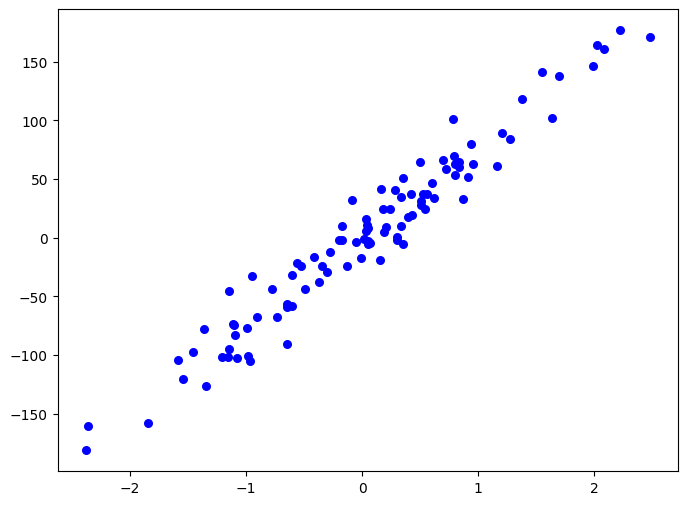

In [20]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

figure = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color="b", marker="o", s=30)

In [21]:
regression_model = LinearRegression(learning_rate=0.01, n_iters=100)
regression_model.fit(X_train, y_train)
y_predictions = regression_model.predict(X_test)
print(y_predictions)

mse = regression_model.mean_squared_error(y_test, y_predictions)
print("cost:", mse)

[ 57.98623153  42.12119416 -28.67289145 -52.15873277  13.85695368
 -46.69105572  -9.02407426  97.28954137   9.43901092 -64.79878605
  10.42912582  27.04683193  17.21681494  24.82362573  24.35281521
 -23.35188117 -52.56413246  17.2813099   24.83037723  19.2911104 ]
cost: 779.2367646459217


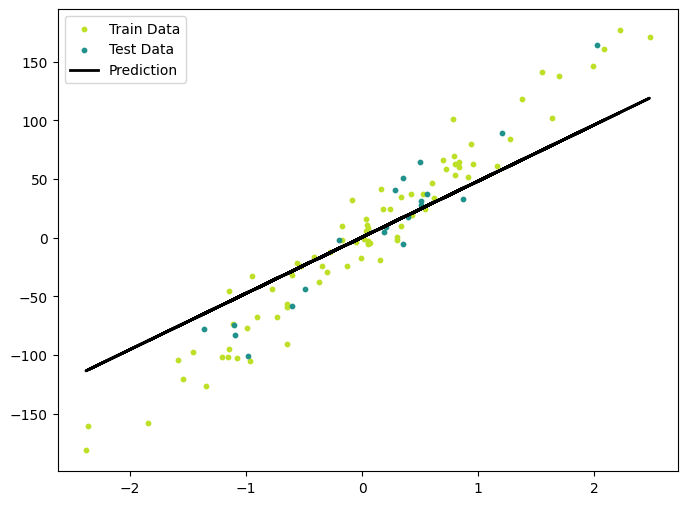

In [22]:
straight_line = regression_model.predict(X)
cmap = plt.get_cmap("viridis")
figure = plt.figure(figsize=(8, 6))
# now we plot the traiing data and the test data for comparison to check how well the model performs
train1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10, label="Train Data")
test1 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10, label="Test Data")
plt.plot(X, straight_line, color='black', linewidth=2, label='Prediction')
plt.legend()
plt.show()
